# Task for Polynomial Regression

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [25]:
x=df[["Temperature (°C)"]]
y=df[["Ice Cream Sales (units)"]]

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_Poly = poly.fit_transform(x_train)

In [28]:
lr = LinearRegression()
lr.fit(x_Poly, y_train)

LinearRegression()

In [29]:
x_test_poly = poly.fit_transform(x_test)
y_pred = lr.predict(x_test_poly)

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test, y_pred))
print("R2-Score:",r2_score(y_test, y_pred))

MSE: 13.305418468740527
R2-Score: 0.8038545160525795


In [31]:
p= lr.predict(poly.fit_transform([[0.5]]))
print(p)

[[2.20688087]]


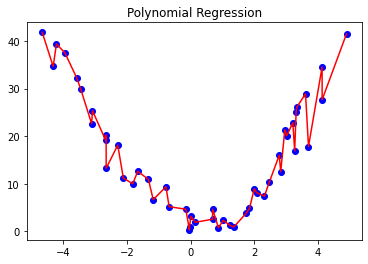

In [32]:
plt.scatter(x,y,color='blue')
plt.plot(x,y,color='red')
plt.title('Polynomial Regression')
plt.show()

# KNN Algoritham [ K-Nearest Neighbour ]

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
y=df['Outcome']
x=df.drop('Outcome',axis=1)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2)

In [39]:
nn = KNeighborsClassifier(n_neighbors=27)

In [47]:
model = nn.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [48]:
y_test

158    0
251    0
631    0
757    1
689    1
      ..
733    0
441    0
627    0
84     1
55     0
Name: Outcome, Length: 154, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[98, 11],
       [24, 21]], dtype=int64)

In [50]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TP, FN, TN, FP)


21 24 98 11


In [51]:
accuracy = (TP + TN) / (TP+FP+FN+TN)
accuracy

0.7727272727272727